## 인코더랑 라벨 다시 만들기

In [1]:
import pandas as pd
import joblib
from sklearn.preprocessing import LabelEncoder

# ================================
# 1. Training 데이터 불러오기 및 encoder 생성, 저장
# ================================
# training 데이터 파일 경로에 맞게 수정하세요.
train_df = pd.read_csv('../data/numeric_train.csv')

# 타겟 변수 추출 (예시: 'Segment' 컬럼)
y_train = train_df['Segment']

# LabelEncoder 생성 및 학습
le_target = LabelEncoder()
le_target.fit(y_train)

# 학습된 encoder 저장 (나중에 불러와서 사용)
joblib.dump(le_target, "le_target.joblib")
print("LabelEncoder(le_target) 저장 완료: le_target.joblib")

# ================================
# 2. 저장된 모델 불러오기
# ================================
# 모델 파일명(여기서는 xgboost_depth10_f10.8205.joblib) 수정 필요
model = joblib.load("xgboost_depth10_f10.8205.joblib")
print("모델 로드 완료.")

LabelEncoder(le_target) 저장 완료: le_target.joblib
모델 로드 완료.


In [2]:
import joblib
from sklearn.preprocessing import StandardScaler

# 학습 시: scaler를 fit하고 저장
scaler = StandardScaler()
X_scaled = scaler.fit_transform(train_df.drop(columns=["Segment"]))
joblib.dump(scaler, "scaler.joblib")


['scaler.joblib']

In [3]:
# ================================
# 3. Test 데이터 불러오기 및 예측 수행
# ================================
# test 데이터 파일 경로에 맞게 수정하세요.
test_df = pd.read_csv('../data/all_test.csv')

# 예측용 데이터(X_test)는 'ID' 컬럼만 제거한 복사본 사용
X_test = test_df.select_dtypes(exclude=['object']).iloc[:, 1:]

# # 테스트 시: 저장된 scaler 불러오기
# scaler = joblib.load("scaler.joblib")
X_test_scaled = scaler.transform(X_test)

# row-level 예측 수행
y_test_pred = model.predict(X_test_scaled)

# 저장된 encoder 불러오기 (또는 위에서 생성한 encoder 사용)
# le_target = joblib.load("le_target.joblib")  # 이미 생성되어 있으므로 재사용 가능

# 예측 결과를 원래 레이블로 복원
y_test_pred_labels = le_target.inverse_transform(y_test_pred)

# ================================
# 4. 제출 파일 생성 및 저장
# ================================
# 원본 test 데이터 복사하여 예측 결과 추가
test_data = test_df.copy()
test_data["pred_label"] = y_test_pred_labels

# ID별로 가장 빈도수가 높은 예측값 선택 (필요한 경우 그룹화 기준 확인)
submission = test_data.groupby("ID")["pred_label"] \
    .agg(lambda x: x.value_counts().idxmax()) \
    .reset_index()
submission.columns = ["ID", "Segment"]

# 제출 파일을 xgboost_d10.csv로 저장
submission.to_csv("xgboost_d10.csv", index=False)
print("제출 파일 xgboost_d10.csv 저장 완료")


C:\Users\SSAFY\AppData\Local\Temp\ipykernel_19048\2155481503.py:5: DtypeWarning: Columns (299) have mixed types. Specify dtype option on import or set low_memory=False.
  test_df = pd.read_csv('../data/all_test.csv')


제출 파일 xgboost_d10.csv 저장 완료


In [5]:
%pip install matplotlib

You should consider upgrading via the 'c:\Users\SSAFY\Desktop\개인폴더\DACON\01_신용카드_고객_세그먼트_분류_AI_경진대회\venv\Scripts\python.exe -m pip install --upgrade pip' command.



  Using cached matplotlib-3.9.4-cp39-cp39-win_amd64.whl (7.8 MB)
  Using cached pillow-11.1.0-cp39-cp39-win_amd64.whl (2.6 MB)
  Using cached contourpy-1.3.0-cp39-cp39-win_amd64.whl (211 kB)
  Using cached importlib_resources-6.5.2-py3-none-any.whl (37 kB)
  Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
  Using cached pyparsing-3.2.3-py3-none-any.whl (111 kB)
  Using cached kiwisolver-1.4.7-cp39-cp39-win_amd64.whl (55 kB)
  Using cached fonttools-4.56.0-cp39-cp39-win_amd64.whl (2.2 MB)


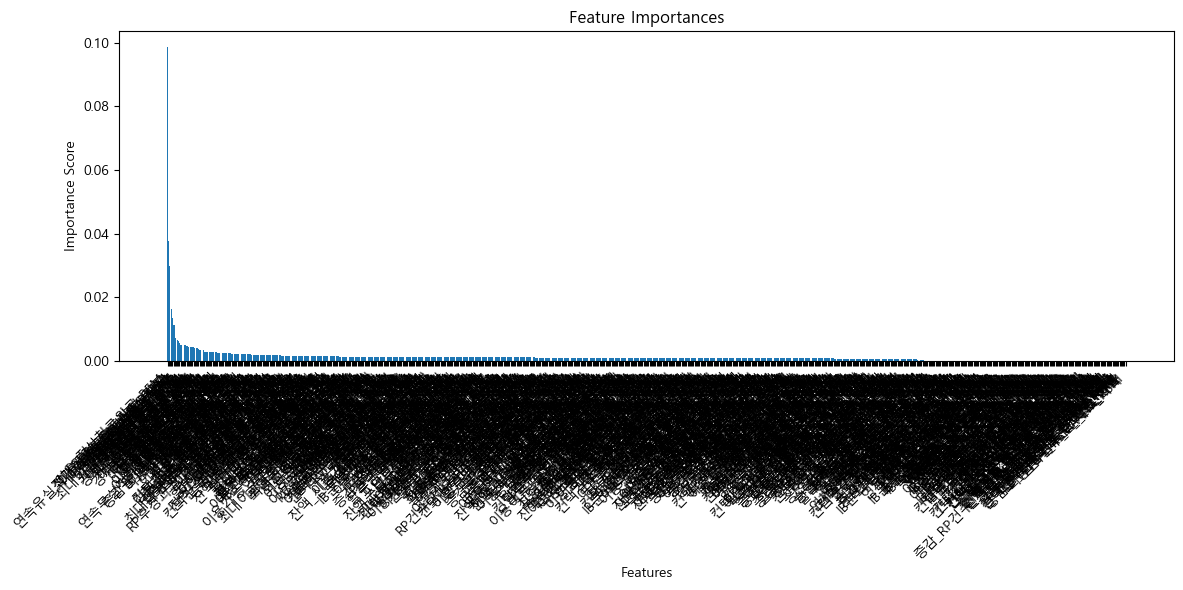

In [11]:
import matplotlib.pyplot as plt
import numpy as np

# 학습 시 사용한 데이터의 피처 이름 (예: X_train이나 X의 컬럼 이름)
feature_names = X_test.columns

# 모델의 feature importances
importances = model.feature_importances_

# 내림차순 정렬을 위한 인덱스
indices = np.argsort(importances)[::-1]

# 그래프 그리기
plt.figure(figsize=(12, 6))
plt.bar(range(len(importances)), importances[indices], align='center')
plt.xticks(range(len(importances)), [feature_names[i] for i in indices], rotation=45, ha='right')
plt.title("Feature Importances")
plt.xlabel("Features")
plt.ylabel("Importance Score")
plt.tight_layout()
plt.show()


### 상위 20개만

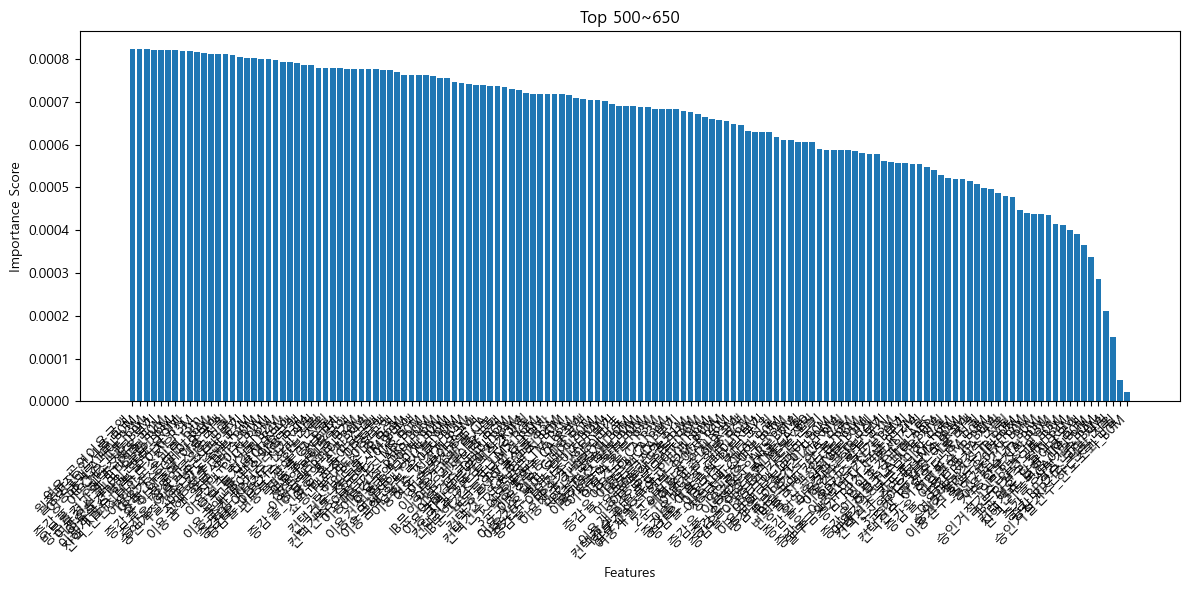

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Windows 시스템에 기본적으로 있는 한글 폰트 설정 (예: 'Malgun Gothic')
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False  # 마이너스 깨짐 방지

# 학습 시 사용한 데이터의 피처 이름 (예: X DataFrame의 컬럼)
feature_names = X_test.columns

# 모델의 feature importances
importances = model.feature_importances_

# 내림차순 정렬 후 상위 20개 인덱스 선택
indices = np.argsort(importances)[::-1][500:650]

# 상위 20개 피처의 이름과 중요도 값
top_features = [feature_names[i] for i in indices]
top_importances = importances[indices]

# 그래프 그리기
plt.figure(figsize=(12, 6))
plt.bar(range(len(top_importances)), top_importances, align='center')
plt.xticks(range(len(top_importances)), top_features, rotation=45, ha='right')
plt.title("Top 500~650")
plt.xlabel("Features")
plt.ylabel("Importance Score")
plt.tight_layout()
plt.show()


In [26]:
import numpy as np

# 피처 이름과 중요도
feature_names = X_test.columns
importances = model.feature_importances_

# 중요도 기준 내림차순 정렬 후 상위 640개 인덱스 선택
top_k = 640
indices = np.argsort(importances)[::-1][:top_k]

# 상위 640개 피처 이름 리스트로 추출
important_features = [feature_names[i] for i in indices]

# 결과 확인 (예: 상위 10개 미리보기)
print(important_features[:10])


['정상청구원금_B5M', '이용금액_오프라인_B0M', '연속유실적개월수_기본_24M_카드', '최대이용금액_체크_R12M', '이용금액_R3M_신용체크', '이용금액_체크_R12M', '이용금액_체크_B0M', '이용건수_신용_R12M', '이용금액_일시불_R12M', '정상청구원금_B0M']


In [27]:
import joblib

# important_features 리스트 저장
joblib.dump(important_features, 'important_features.pkl')
print("🔐 important_features 리스트 저장 완료: important_features.pkl")


🔐 important_features 리스트 저장 완료: important_features.pkl


### 중요한 열만 모아서 따로 저장

In [1]:
import joblib

# 저장된 important_features 리스트 불러오기
important_features = joblib.load('important_features.pkl')

In [2]:
import pandas as pd

numeric_df = pd.read_csv("../data/numeric_train.csv")

important_df = numeric_df[important_features + ['Segment']]

important_df.to_csv('../data/important_train.csv', index = False)

In [3]:
important_df.head()

,정상청구원금_B5M,이용금액_오프라인_B0M,연속유실적개월수_기본_24M_카드,최대이용금액_체크_R12M,이용금액_R3M_신용체크,이용금액_체크_R12M,이용금액_체크_B0M,이용건수_신용_R12M,이용금액_일시불_R12M,정상청구원금_B0M,...,승인거절건수_입력오류_R3M,IB문의건수_결제_R6M,여유_항공이용금액,컨택건수_보험_TM_B0M,잔액_리볼빙CA이월_B0M,상담건수_B0M,증감_RP건수_보험_전월,증감_RP건수_렌탈_전월,승인거절건수_한도초과_B0M,Segment
0,14958,4043,13,1020,196,6474,0,165,20667,14440,...,0,0,0,0,0,0,0,0,0,D
1,3367,3980,12,0,13475,-414,0,204,54341,6024,...,0,0,0,0,0,0,0,0,0,E
2,23963,4524,8,0,23988,-414,0,148,55656,21929,...,0,0,0,0,0,2,0,0,0,C
3,19614,3975,5,0,3904,871,0,105,10753,18563,...,0,0,0,0,0,0,0,0,0,D
4,0,0,0,3324,1190,10754,0,-1,-2129,0,...,0,0,0,0,0,0,0,0,0,E


In [6]:
import pandas as pd
import joblib
from sklearn.preprocessing import LabelEncoder

# 1. 데이터 읽기 및 원본 보존
test_df = pd.read_csv('../data/all_test.csv')

# 제출 파일 작성을 위해 원본 데이터(test_df)는 그대로 사용하고,
# 예측을 위한 데이터(X_test)는 'ID' 컬럼만 제거한 복사본을 사용합니다.
X_test = test_df.select_dtypes(exclude=['object'])

C:\Users\SSAFY\AppData\Local\Temp\ipykernel_10892\1700321687.py:6: DtypeWarning: Columns (299) have mixed types. Specify dtype option on import or set low_memory=False.
  test_df = pd.read_csv('../data/all_test.csv')


In [12]:
X_test = X_test.iloc[:, 1:]
X_test.head()

,기준년월,남녀구분코드,회원여부_이용가능,회원여부_이용가능_CA,회원여부_이용가능_카드론,소지여부_신용,소지카드수_유효_신용,소지카드수_이용가능_신용,입회일자_신용,입회경과개월수_신용,...,변동률_RV일시불평잔,변동률_할부평잔,변동률_CA평잔,변동률_RVCA평잔,변동률_카드론평잔,변동률_잔액_B1M,변동률_잔액_일시불_B1M,변동률_잔액_CA_B1M,혜택수혜율_R3M,혜택수혜율_B0M
0,201807,1,1,1,0,1,2,2,20140501,51,...,0.999998,0.999998,0.999998,0.999998,0.999998,0.209395,0.231043,0.0,1.332770,1.780392
1,201807,1,1,1,0,1,1,1,20160201,30,...,0.999998,1.044473,1.991974,0.999998,0.926569,-0.269161,-0.247241,0.0,0.000000,0.000000
2,201807,1,1,1,1,1,2,2,20180301,5,...,0.999998,1.053083,0.999998,0.999998,0.999998,-0.120290,0.029270,0.0,4.123738,5.115589
3,201807,2,1,1,1,1,1,1,20120701,73,...,0.999998,1.991630,0.999998,0.999998,0.999998,0.035807,-0.013359,0.0,0.093615,0.349994
4,201807,2,1,0,1,1,1,1,20031201,176,...,0.999998,1.053743,0.999998,0.999998,0.999998,-0.538740,-0.449378,0.0,0.000000,0.000000


In [13]:

# 2. 저장된 모델과 LabelEncoder 불러오기  
model = joblib.load("xgboost_depth10_f10.8205.joblib")
le_target = LabelEncoder()

# 3. row-level 예측 수행
y_test_pred = model.predict(X_test)

# 4. 예측 결과를 원래 레이블로 변환
y_test_pred_labels = le_target.inverse_transform(y_test_pred)

# 5. 원본 데이터(test_df)에 예측 결과 추가
test_data = test_df.copy()
test_data["pred_label"] = y_test_pred_labels

# 6. ID별로 가장 빈도수가 높은 예측값을 선택하여 제출 파일 생성
submission = test_data.groupby("ID")["pred_label"] \
    .agg(lambda x: x.value_counts().idxmax()) \
    .reset_index()
submission.columns = ["ID", "Segment"]

# 7. 제출 파일 저장
submission.to_csv("xgboost_d10.csv", index=False)
print("제출 파일 xgboost_d10.csv 저장 완료")


NotFittedError: This LabelEncoder instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.